In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os
import re
import string
import seaborn as sns
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10.7,4.27)})

## Load Data

In [2]:
# raw_data
file = '05_clean_data.csv'
data_directory = os.path.join( '..','data','raw_data/{}'.format(file))

In [3]:
df = pd.read_csv(data_directory)

In [4]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,sex,age_when_recorded
0,Enissa Amani,Ehrenwort,"Live from Hamburg, Iranian-German comedian Eni...",2018,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...,55660,1981-01-01,Male,37
1,Ken Jeong,"You Complete Me, Ho",Filmed at the Ice House Comedy Club in Pasaden...,2019,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...,46046,1969-07-13,Male,50
2,Ray Romano,"Right Here, Around The Corner",Ray Romano cut his stand-up teeth at the Comed...,2019,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,41464,1957-12-21,Male,62
3,Gabriel Iglesias,One Show Fits All,"In a new special from Houston, Gabriel ""Fluffy...",2019,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...,62291,1976-07-15,Male,43
4,Sebastian Maniscalco,Stay Hungry,Sebastian's captivating storytelling keeps the...,2019,[instrumental music plays] ♪ All right ♪ [scre...,https://scrapsfromtheloft.com/2019/01/29/sebas...,40766,1973-01-01,Male,46


## Select name title and transcript

In [5]:
data = df[['name','title','transcript']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 3 columns):
name          217 non-null object
title         217 non-null object
transcript    217 non-null object
dtypes: object(3)
memory usage: 5.2+ KB


In [7]:
data.head()

,name,title,transcript
0,Enissa Amani,Ehrenwort,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s..."
1,Ken Jeong,"You Complete Me, Ho",The Hangover… Community… Dr. Ken… Crazy Rich A...
2,Ray Romano,"Right Here, Around The Corner",It’s been 23 years since I did a comedy specia...
3,Gabriel Iglesias,One Show Fits All,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...
4,Sebastian Maniscalco,Stay Hungry,[instrumental music plays] ♪ All right ♪ [scre...


In [ ]:
## 

In [ ]:
len(data.name.value_counts())

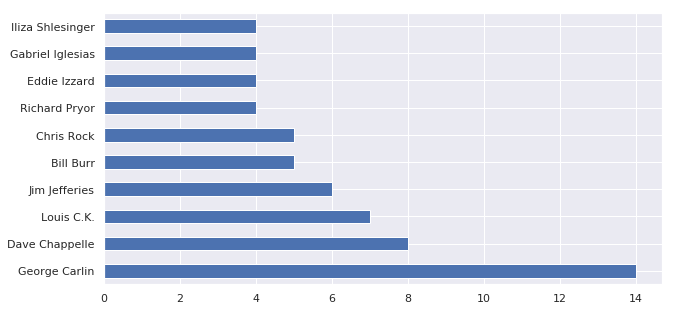

In [8]:
data.name.value_counts()[:10].plot('barh',figsize=(10,5))

## Clean transcripts

In [9]:
data.head()

,name,title,transcript
0,Enissa Amani,Ehrenwort,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s..."
1,Ken Jeong,"You Complete Me, Ho",The Hangover… Community… Dr. Ken… Crazy Rich A...
2,Ray Romano,"Right Here, Around The Corner",It’s been 23 years since I did a comedy specia...
3,Gabriel Iglesias,One Show Fits All,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...
4,Sebastian Maniscalco,Stay Hungry,[instrumental music plays] ♪ All right ♪ [scre...


In [10]:
def clean_text(data):
    #print(type(data))
    text = data.lower()
    text = re.sub('\[.*?\]', '', text)  # remove brackets & text inside
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # remove punctuations
    text = re.sub('\w*\d\w*', '', text)  # remove digits surounded by words
    text = re.sub('[‘’“”…]', '', text)  # remove quotes & elipses
    text = re.sub('\n', ' ', text)  # remove new line
    text = re.sub('\t', ' ', text)  # remove new line
    #text = re.sub(string.whitespace, '', text)  # remove \n\t..
    return text

In [ ]:
test = data.copy()[:10]

In [ ]:
test

In [ ]:
test['ct'] = test.apply(clean_text_round1,axis=1)

In [ ]:
test['tt'] = test.transcript.apply(test_data)

In [ ]:
test

In [ ]:
test.transcript[0][:1000]

In [ ]:
test.tt[0][:1000]

In [ ]:

# Apply a second round of cleaning
def clean_text_round2(data):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = data['ct']
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [ ]:
test['ct2'] = test.apply(clean_text_round2,axis=1)

In [ ]:
test

In [ ]:
data.head()

In [ ]:
data['clean_text'] = data.transcript.apply(clean_text)

In [ ]:
data.head()

In [ ]:
data.clean_text.head()

# DTM

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.clean_text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data['name']
data_dtm

In [ ]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict